In [2]:
import cv2
import pytesseract
from PIL import Image
import pandas as pd
import re
import numpy as np
import random
import datefinder

GETTING THE IMAGE INTO THE NOTEBOOK

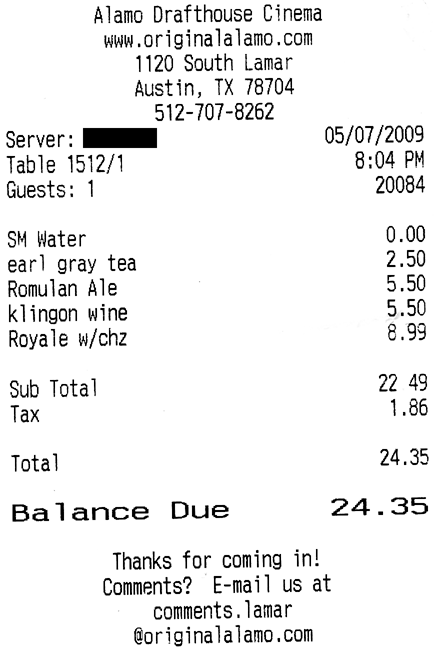

In [3]:
Image.open('final.png')

In [4]:
img=Image.open('final.png')

GETTING TEXT FROM IMAGE USING TESSERACT OCR

In [5]:
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'
text=pytesseract.image_to_string(img)

In [6]:
print( pytesseract.image_to_string(img) )

Alamo Drafthouse Cinema
wiw.originalalamo .com
1120 South Lamar
Austin, TX 78704
512-707-8262

Server: RRR 05/07/2003
Table 1512/1 8:04 PM
Guests: 1 20084
SH Hater 0.00
earl gray tea 2.50
Ronulan Ale 5.50
klingon wine 5.50
Royale w/chz 8.93
Sub Total 22 43
Tax 1.86
Total 24.35
Balance Due 24.35

Thanks for coming in!
Comments? E-mail us at
conments . lanar
Goriginalalano .com




EXTRACTING THE RELEVENT INFORMATION FROM THE TEXT

In [7]:
list=text.split('\n')

In [8]:
list

['Alamo Drafthouse Cinema',
 'wiw.originalalamo .com',
 '1120 South Lamar',
 'Austin, TX 78704',
 '512-707-8262',
 '',
 'Server: RRR 05/07/2003',
 'Table 1512/1 8:04 PM',
 'Guests: 1 20084',
 'SH Hater 0.00',
 'earl gray tea 2.50',
 'Ronulan Ale 5.50',
 'klingon wine 5.50',
 'Royale w/chz 8.93',
 'Sub Total 22 43',
 'Tax 1.86',
 'Total 24.35',
 'Balance Due 24.35',
 '',
 'Thanks for coming in!',
 'Comments? E-mail us at',
 'conments . lanar',
 'Goriginalalano .com',
 '',
 '']

In [7]:
for i in list:
    list1=i.split(' ')

In [8]:
print(list)

['Alamo Drafthouse Cinema', 'wiw.originalalamo .com', '1120 South Lamar', 'Austin, TX 78704', '512-707-8262', '', 'Server: RRR 05/07/2003', 'Table 1512/1 8:04 PM', 'Guests: 1 20084', 'SH Hater 0.00', 'earl gray tea 2.50', 'Ronulan Ale 5.50', 'klingon wine 5.50', 'Royale w/chz 8.93', 'Sub Total 22 43', 'Tax 1.86', 'Total 24.35', 'Balance Due 24.35', '', 'Thanks for coming in!', 'Comments? E-mail us at', 'conments . lanar', 'Goriginalalano .com', '', '']


In [9]:
name=list[0]
print(name)

Alamo Drafthouse Cinema


In [10]:
total_price=list[16].split(' ')[1]
total_price

'24.35'

In [11]:
tax=list[15].split(' ')[1]
tax

'1.86'

In [12]:
products=list[10:14]
print(products)

['earl gray tea 2.50', 'Ronulan Ale 5.50', 'klingon wine 5.50', 'Royale w/chz 8.93']


In [13]:
for i in products:
    product=(i.split(' ')[0:2])
    print(product)

['earl', 'gray']
['Ronulan', 'Ale']
['klingon', 'wine']
['Royale', 'w/chz']


In [14]:
for i in products:
    prices=(i.split(' ')[2])
    print(prices)

tea
5.50
5.50
8.93


In [15]:
for i in list:
    if((i.split(' ')[0].lower()=='tax')or(i.split(' ')[0].lower()=='total')):
        arr=np.array(i)

In [16]:
time=list[7][13:]
print(time)

8:04 PM


In [17]:
for i in list:
    test=i.split(' ')[-1]
    matched = re.match("[0-9][0-9]/[0-9][0-9]/[0-9][0-9][0-9][0-9]", test)
    if(bool(matched)):
        date=test

In [18]:
date

'05/07/2003'

Appending extracted data into a dataframe

In [19]:
data = {'Name Of Resturant':[name],'Date':[date],'Time':[time],'Tax':[tax],'Total price':[total_price]}
df = pd.DataFrame (data, columns = ['Name Of Resturant','Date','Time','Tax','Total price'])
print (df)

         Name Of Resturant        Date     Time   Tax Total price
0  Alamo Drafthouse Cinema  05/07/2003  8:04 PM  1.86       24.35


In [20]:
data = {'Items Brought':  [products[0][0:-4],products[1][0:-4],products[2][0:-4],products[3][0:-4]],
        'Price':  [products[0][-4:],products[1][-4:],products[2][-4:],products[3][-4:]]}
df = pd.DataFrame (data, columns = ['Items Brought','Price'])
print (df)

    Items Brought Price
0  earl gray tea   2.50
1    Ronulan Ale   5.50
2   klingon wine   5.50
3   Royale w/chz   8.93
